In [26]:
import numpy as np
import random
# DPRL Assignment 1

T = 1000# times max 1000
T1 = 500
T2 = 900
x_max = T # max stock state
# d = 2 #random.randint(1,100)*0.01 
# d = 0.01 * t # random demand 
h = 0.01 # holding cost
K =10 # order costs 

def price(t):
    if t<=T1:
        return 10
    if t>T1 and t<=T2:
        return 10
    if t>T2:
        return 0

In [27]:
# initial matrix and set the step 0 profit column
V = np.zeros((x_max+1,T+1))
alpha = np.zeros((x_max+1,T+1),dtype=int)
Xstate = np.zeros((x_max+1,T+1),dtype=int)
Q = np.zeros((T+2))
for x in range(1,x_max+1):
    V[x,T]= - 20 + h*x 

In [33]:
# backward recursion
for t in range(T-1,-1,-1): #999...0
    if t>900: # t>900, no purchase , a=0
#         print(t)
        a=0
        for x in range(0,500):#
            Q[a] = -20*(t/T)*(x>0) + x*h + (t/T)*V[max(x-1+a,0),t+1] + (1-t/T)*V[max(x-0+a,0),t+1]#V[min(x-0+a,x_max),t] #  - K*(a>0) - price(t)*a
             # print(Q[a],V[x-1+a,t],V[x-0+a,t])
            V[x,t] = Q[a]
            Xstate[x,t] = x
            alpha[x,t] = a
    if t<=900: # t: 1.....900
        for x in range(0,500): # 500 x--剩下的空间
            for a in range(max(1-x,0),max(T-t-x+1,0)):#range(max((d-x),0),x_max-x+d+1): # a --剩下最多买的
            # print(t,x,a,x-0+a)
                Q[a+1] = -20*(t/T)*(x>0) + x*h + K*(a>0) + price(t)*a + (t/T)*V[x-1+a,t+1] + (1-t/T)*V[x-0+a,t+1] # transition is x-d+a
            V[x,t] = Q[max(1-x,0)+1]
            alpha[x,t] = max(1-x,0)                                                                                  
            for a in range(max(1-x,0),max(T-t-x+1,0)):
                if(Q[a+1]<V[x,t]):
                    alpha[x,t] = a
                    Xstate[x,t] = x
                    V[x,t] = Q[a+1]

In [10]:
# V[1,2]=1
print("V:")
# print(V)
# print(V[0,0])
# print(V[0,1])
# print(V[0,100])
# print(V[0,1000])

# print(V[1,0])
# print(V[1,1000])
# print(V[1000,1000])

print("Q:")
# print(Q)
# print(V[0,x_max-1])
print("alpha:")
print(alpha[0,1])
print(alpha[0,10])
print(alpha[0,498])
# print(alpha[0,1000])
# for x in range(0,1000):
#     for t in range (1000):
#         print(x,t,"action:",alpha[x,t])
print(-V[0,0])

V:
Q:
alpha:
10
11
365
3792.262154924822


In [34]:
# check for values
print("x t a V")

check_example = [0,1,2,6,11,23,99,349,432,500,682,733,829,900,990]

xi = 10
for i in range(len(check_example)):
    ti = check_example[i]
#     print(xi,ti)
    value = V[xi,ti]
    a = alpha[xi,ti]
    print(xi,ti,a,-value)
    

x t a V
10 0 0 4767.506521885831
10 1 0 4767.606521885831
10 2 0 4767.696576968761
10 6 0 4767.957732165299
10 11 0 4768.062640976914
10 23 0 4767.321610289606
10 99 0 4730.968129223395
10 349 0 4226.665737296551
10 432 0 3926.9345443449542
10 500 0 3631.778216679654
10 682 0 2621.2204076415474
10 733 0 2280.159421728625
10 829 0 1568.7015170794284
10 900 86 983.4997887042999
10 990 0 199.4201098625129


In [12]:
# print(len(policy))
# print(policy)
# print([random.randint(1, 1000) for _ in range(1000)])

# print(alpha[0,].tolist())
# print(stimulate_range[0,].tolist())
x_axis = []
for i in range(11):
    x_axis.append(100*i) 
print(x_axis)
# print(type(["2019/10/{}".format(i + 1) for i in range(30)]))

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [13]:
# while t=1, x=0 ,depends on the optimal policy matrix we already have, choose my own policy
stimulate_range = np.zeros((1,T+1),dtype=int) # store 1000 dt i stimulate
for i in range(0,1001):
    stimulate_range[0,i] = i
print(stimulate_range[0,0],stimulate_range[0,1000])
print(len(stimulate_range.T))

Dt = np.zeros((10,T+1),dtype=int) # initial d #stimulate d ,d = 1 or 0
for s in range(10):
    for i in range(0,1001):
        p = random.randint(0,1000)
        if p >= i:
            d = 0
        else:
            d = 1
        Dt[s,i] = d
    
print(Dt[0,0],Dt[0,500],Dt[0,1000])
print(Dt[1,0],Dt[1,500],Dt[1,1000])
print(Dt[4,0],Dt[4,500],Dt[4,1000])
print(Dt[8,0],Dt[8,500],Dt[8,1000])
print(len(Dt.T))

0 1000
1001
0 1 1
0 0 1
0 0 1
0 1 1
1001


In [589]:
print(type(stimulate_range.tolist()))

<class 'list'>


Text(138.5, 0.5, 'State')

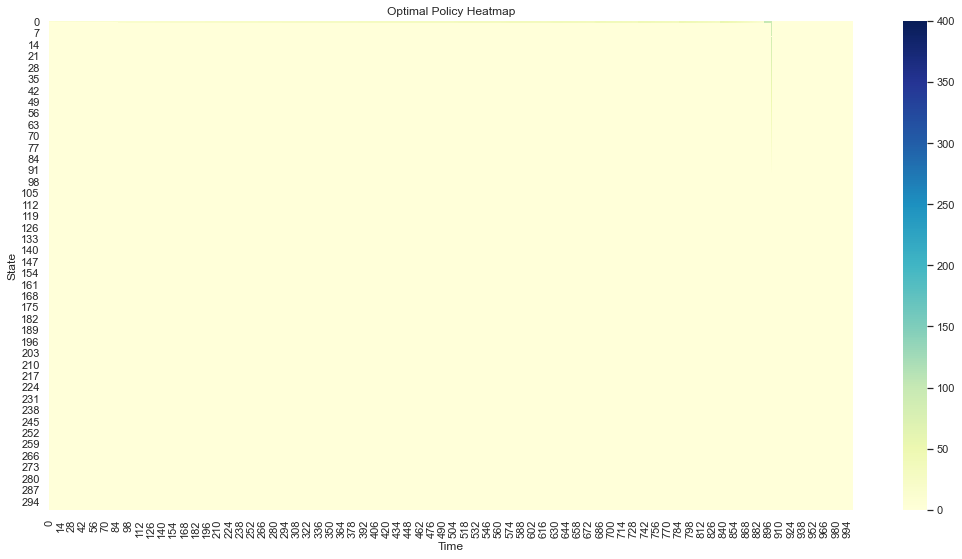

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
ax = plt.subplots(figsize = (18,9))
ax = sns.heatmap(alpha[0:300], cmap="YlGnBu",vmin=0 ,vmax=400)#,linewidths = 0.0001)
ax.set_title('Optimal Policy Heatmap')
ax.set_xlabel('Time')
ax.set_ylabel('State')
# ax.xaxis.tick_top()

In [25]:
# Visuallization of policy alpha martix
# pip install pyecharts
from pyecharts.charts import *
from pyecharts import options as opts
import random

x_data_1 = stimulate_range[0,].tolist()
# x_data_2 = ["2019/10/{}".format(i + 1) for i in range(30)]
y_data_1 = alpha[0,].tolist()


def line_with_two_xaxis():
    line = Line(init_opts=opts.InitOpts(theme='light', width='1000px', height='500px'))
    line.add_xaxis(x_data_1)   # add a x axis
#     line.extend_axis(xaxis_data=x_data_2, xaxis=opts.AxisOpts())
    line.add_yaxis('stste x=0', y_data_1)
#     line.add_yaxis('x=1', y_data_2)
    return line


chart = line_with_two_xaxis()
chart.render_notebook()



In [18]:
# stimulate
# stimulate the demand depends on the time
# while t=1, x=0 ,depends on the optimal policy matrix we already have, choose my own policy

state = np.zeros((10,T+1))
policy = np.zeros((10,T+1))
lost_sales = np.zeros((10,T+1))
for s in range(10):
    T = 1000
    h = 0.01
    K = 10
    x = 0 # start from 0 stock
    profit = 0
    record=[]
    for t in range(T):
        d = Dt[s,t]
    #     d = 1
        a = int(alpha[x,t])
    #     print(x,t,a)
        if t>900:
            profit = profit + 20*d*(x>0) - x*h
        if t<=900:
            profit = profit + 20*d*(x>0) - x*h + K*(a>0) - price(t)*a 
        record.append((x,t,d,a,profit,x-d+a,20*d))
        state[s,t]=x
        policy[s,t]=a
        lost_sales[s,t]=20*d
        x = x - d + a # transition

    print(profit)
print(state[0,])
print(policy[0,])
print(lost_sales[0,])
# lost_when=[]
# for t in range(1000):
#     if lost_sales[0,t]>0:
#         lost_when.append(t)
# print(lost_when)

3948.8999999999987
3709.090000000001
4181.3499999999985
3943.780000000004
3711.399999999999
3902.9899999999975
4014.380000000003
3921.100000000004
4196.959999999997
3969.1000000000004
[ 0. 10. 10. ...  2.  1.  0.]
[10.  0.  0. ...  0.  0.  0.]
[ 0.  0.  0. ... 20. 20.  0.]


In [19]:
# Visuallization of policy state martix
# pip install pyecharts
from pyecharts.charts import *
from pyecharts import options as opts
import random

x_data_1 = stimulate_range[0,].tolist()
# x_data_2 = ["2019/10/{}".format(i + 1) for i in range(30)]
y_data_1 = state[0,].tolist()
y_data_2 = state[1,].tolist()
y_data_3 = state[2,].tolist()
y_data_4 = state[3,].tolist()
y_data_5 = state[4,].tolist()
y_data_6 = state[5,].tolist()
y_data_7 = state[6,].tolist()
y_data_8 = state[7,].tolist()
y_data_9 = state[8,].tolist()
y_data_10 = state[9,].tolist()


def line_with_two_xaxis():
    line = Line(init_opts=opts.InitOpts(theme='light', width='1000px', height='500px'))
    line.add_xaxis(x_data_1)   # add a x axis
#     line.extend_axis(xaxis_data=x_data_2, xaxis=opts.AxisOpts())
    line.add_yaxis('1st stimulate state', y_data_1)
    line.add_yaxis('2nd', y_data_2)
    line.add_yaxis('3rd', y_data_3)
    line.add_yaxis('4th', y_data_4)
    line.add_yaxis('5th', y_data_5)
    line.add_yaxis('6th', y_data_6)
    line.add_yaxis('7th', y_data_7)
    line.add_yaxis('8th', y_data_8)
    line.add_yaxis('9th', y_data_9)
    line.add_yaxis('10th', y_data_10)

  
    return line


chart = line_with_two_xaxis()
chart.render_notebook()

In [565]:
# Visuallization of policy state martix
# pip install pyecharts
from pyecharts.charts import *
from pyecharts import options as opts
import random

x_data_1 = stimulate_range[0,].tolist()
# x_data_2 = ["2019/10/{}".format(i + 1) for i in range(30)]
y_data_1 = policy[0,].tolist()
y_data_2 = policy[1,].tolist()
y_data_3 = policy[2,].tolist()
y_data_4 = policy[3,].tolist()
y_data_5 = policy[4,].tolist()
y_data_6 = policy[5,].tolist()
y_data_7 = policy[6,].tolist()
y_data_8 = policy[7,].tolist()
y_data_9 = policy[8,].tolist()
y_data_10 = policy[9,].tolist()

def line_with_two_xaxis():
    line = Line(init_opts=opts.InitOpts(theme='light', width='1000px', height='500px'))
    line.add_xaxis(x_data_1)   # add a x axis
#     line.extend_axis(xaxis_data=x_data_2, xaxis=opts.AxisOpts())
    line.add_yaxis('1st stimulate policy', y_data_1)
    line.add_yaxis('2nd', y_data_2)
    line.add_yaxis('3rd', y_data_3)
    line.add_yaxis('4th', y_data_4)
    line.add_yaxis('5th', y_data_5)
    line.add_yaxis('6th', y_data_6)
    line.add_yaxis('7th', y_data_7)
    line.add_yaxis('8th', y_data_8)
    line.add_yaxis('9th', y_data_9)
    line.add_yaxis('10th', y_data_10)
    return line


chart = line_with_two_xaxis()
chart.render_notebook()

In [43]:
import numpy as np
# DPRL Assignment 1

T = 10 # times max 10
x_max = 10 # max stock state
d = 2 
# d = 0.01 * t # random demand 
h = 1 # holding cost
K = 5 # order costs 

V = np.zeros((x_max+1,T))
alpha = np.zeros((x_max+1,T))
Q = np.zeros((x_max*2))
for i in range(x_max+1):
    V[i,T-1]= h*i 

for t in range(1,T): # no purchase price at t in (500,1000) #backward loop over time
    # print(t) #1,2,3...9
    t = T-t
    for x in range(0,x_max+1):
        for a in range(max((d-x),0),x_max-x+d+1):
            Q[a+1] = x*h + K*(a>0) + V[x-d+a,t]
        V[x,t-1] = Q[max(d-x,0)+1]
        alpha[x,t-1] = max(d-x,0)
        for a in range(max(d-x,0), x_max-x+d+1):
            if(Q[a+1]<V[x,t-1]):
            # if(Q[a+1]>V[x,t-1]):
                alpha[x,t-1]=a
                V[x,t-1] = Q[a+1]

# V[1,2]=1
print("V:")
print(V)
print("Q:")
print(Q)
# print(V[0,x_max-1])
print("alpha:")
print(alpha)

print("V x t a")
max_list = []

for t in range(T):
    x_list = []
    for x in range(x_max+1):
        x_list.append((V[x,t],x,t,alpha[x,t]))
        # x_list.append((22,x,t,33))
    max_list.append(min(x_list))

print(max_list)


V:
[[32. 28. 25. 21. 18. 14. 11.  7.  5.  0.]
 [33. 29. 26. 22. 19. 15. 12.  8.  6.  1.]
 [30. 27. 23. 20. 16. 13.  9.  7.  2.  2.]
 [32. 29. 25. 22. 18. 15. 11.  9.  4.  3.]
 [31. 27. 24. 20. 17. 13. 11.  6.  6.  4.]
 [34. 30. 27. 23. 20. 16. 14.  9.  8.  5.]
 [33. 30. 26. 23. 19. 17. 12. 12. 10.  6.]
 [37. 34. 30. 27. 23. 21. 16. 15. 12.  7.]
 [38. 34. 31. 27. 25. 20. 20. 18. 14.  8.]
 [43. 39. 36. 32. 30. 25. 24. 21. 16.  9.]
 [44. 41. 37. 35. 30. 30. 28. 24. 18. 10.]]
Q:
[ 0. 44. 54. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47. 46.  0.  0.  0.  0.
  0.  0.]
alpha:
[[4. 4. 4. 4. 4. 4. 6. 4. 2. 0.]
 [3. 3. 3. 3. 3. 3. 5. 3. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
V x t a
[(30.0, 2, 0, 0.0), (27.0, 2, 1, 0.0), (23.0, 2, 2, 0.0), 